<img src="https://drive.google.com/uc?id=1-cL5eOpEsbuIEkvwW2KnpXC12-PAbamr" style="Width:1000px">

# Data Preprocessing 101 

In this first exercise, we will go step by step through the data preparation steps. This guide is not fully comprehensive but it gives you a good understanding of what to do. The main goal is to teach you the `sklearn` syntax for some of the operations.

The skills you acquired with `NumPy` and with `Pandas` in the previous module will come handy here, as well as in the rest of the `machine learning` module!

## Dataset

We will be using the <span style="color:teal">**Todays's dataset:**</span><a href="https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india"> India air quality data, Kaggle</a>, the very same dataset we have seen in the lecture.

# Load the data 

Load the data `raw_data/India_air_quality.csv` into a new `Pandas.DataFrame` that you can call `data`:

In [68]:
from nbta.utils import download_data
download_data(id='1HtOHNoKtbqxsROzC0grJsXLR1CvM58xa')
rds = 42

100% [..........................................................................] 6338593 / 6338593

In [69]:
import pandas as pd

data = pd.read_csv('raw_data/India_air_quality.csv')
data.head()


,stn_code,state,location,type,so2,no2,rspm,spm,pm2_5,date,rainfall
0,NaN,Andhra Pradesh,Hyderabad,Others,5.1,14.2,50.0,128.0,NaN,29/02/2008,NaN
1,229,Odisha,Rayagada,Industrial,2.0,14.5,36.0,54.0,NaN,08/04/2010,53.897548
2,631,Goa,Honda,Residential,5.0,11.0,42.0,19.0,NaN,10/11/2013,NaN
3,674,Karnataka,Davangere,Residential,6.0,9.0,302.0,NaN,NaN,02/01/2015,95.685937
4,NaN,West Bengal,Kolkata,Industrial,7.4,69.5,77.0,164.0,NaN,20/08/2007,83.049383


# 💻 <code>drop_duplicates</code>

Do the following:

1. Check how many duplicates are in the dataframe by chaining together the pandas functions `.duplicated()` and `.sum()` on the dataframe `data`. Save this value as a variable called `duplicates_count`
2. Remove the duplicates from the dataframe by calling the function `.drop_duplicates()` on `data`. NOTE: you need to reassign data to the return value to replace it (`data = data.drop_duplicates()`
3. Check that the duplicates have been removed by doing step 1 again


In [70]:
# Check number of duplicates
duplicates_count = data.duplicated().sum()
duplicates_count

400

In [71]:
# Remove duplicates
data = data.drop_duplicates() 

In [72]:
# Check number of duplicates
data.duplicated().sum()

0

# 💻 <code>train_test_split</code>

Do the following in this sections:
1. Import the `train_test_split` function from `sklearn.model_selection`
2. Create a `y` target series that contains `rspm`: this is what we will use as a label to our supervised training later, i.e. we will try to predict this property.
3. Create an `X` feature matrix (dataframe) that contains all columns except `rspm` (use `data.drop(columns="rspm")`) 
4. Create `X_train`, `y_train` (70% of the data) and a `X_test`, `y_test` (30% of the data) by using the `train_test_split` method
5. Use the `shape` attribute of your `X_train` to verify the number of samples (should be 216741) and features (should be 11) that you have in the train set

**hint 1:** When doing the `train_test_split`, you can set the `test_size` (or `train_size`) to the desired fraction
**hint 2:** You can also split directly two dataframe / matrix together, for instance, `train_test_split(X, y, ...)`. Keep in mind that this returns `X_train, X_test, y_train, y_test` (in this order!)

In [73]:
from sklearn.model_selection import train_test_split

#Create the features

y = data['rspm']
X = data.drop(columns='rspm')

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=rds)

### How many columns / samples?

In [74]:
X_train.shape

(216741, 10)

### ☑️ Test your code

In [75]:
from nbresult import ChallengeResult

result = ChallengeResult('duplicates',
                         duplicates = duplicates_count,
                         dataset = X_train
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.11.2, pytest-7.4.2, pluggy-1.3.0 -- /Users/cedric/.pyenv/versions/3.10/envs/dsml4pe/bin/python3
cachedir: .pytest_cache
rootdir: /Users/cedric/code/cedricmjohn/teaching/Machine-Learning-for-Planet-Earth-Practicals/01-Data-Preparation/02-Preprocessing-101/tests
plugins: anyio-4.0.0
collecting ... collected 2 items

test_duplicates.py::TestDuplicates::test_dataset_length PASSED           [ 50%]
test_duplicates.py::TestDuplicates::test_duplicate_count PASSED          [100%]

============================== 2 passed in 0.24s ===============================


💯 You can commit your code:

git add tests/duplicates.pickle

git commit -m 'Completed duplicates step'

git push origin master



# 💻 Exploratory Data Analysis (EDA)

Do the following in this sections:
1. Check the **data type** of your train set by looking at the `X_train.dtypes`
2. Use the `describe()` method on your `X_train` dataframe to find the various statistics on the numerical values
3. Find the frequency of the different locations by calling the `value_counts()` method on the `X_train.location` series
4. Plot a historgram of distribution of the `X_train.location` series
5. Plot the histograms of all the numerical features in your `X_train` (explore the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html">DataFrame.hist()</a> function)


### What type of data do we have?

In [76]:
X_train.dtypes

stn_code     object
state        object
location     object
type         object
so2         float64
no2         float64
spm         float64
pm2_5       float64
date         object
rainfall    float64
dtype: object

### Describe gives us a lot of useful statistics on numerical columns

In [77]:
X_train.describe()


,so2,no2,spm,pm2_5,rainfall
count,202025.000000,216741.000000,90875.000000,4583.000000,188881.000000
mean,11.133270,26.389450,217.544524,40.501726,79.911407
std,11.093978,17.986456,147.514219,30.202104,20.036673
min,0.000000,-66.400000,0.000000,4.000000,-24.682525
25%,5.000000,14.400000,110.333333,24.000000,66.362289
50%,8.200000,23.000000,184.000000,32.000000,79.861002
75%,14.000000,33.000000,289.000000,46.000000,93.447692
max,909.000000,876.000000,2610.000000,395.000000,166.455104


### We can query the frequency of values. Let's explore the different locations...

In [78]:
X_train['location'].value_counts()

location
Nagpur         6060
Navi Mumbai    5037
Guwahati       4784
Nashik         4485
Pune           4354
               ... 
Bhuj              9
Nizamabad         8
Sarigam           7
Khajuraho         7
Gangtok           1
Name: count, Length: 287, dtype: int64

### We can also plot a histogram of the most frequent locations...

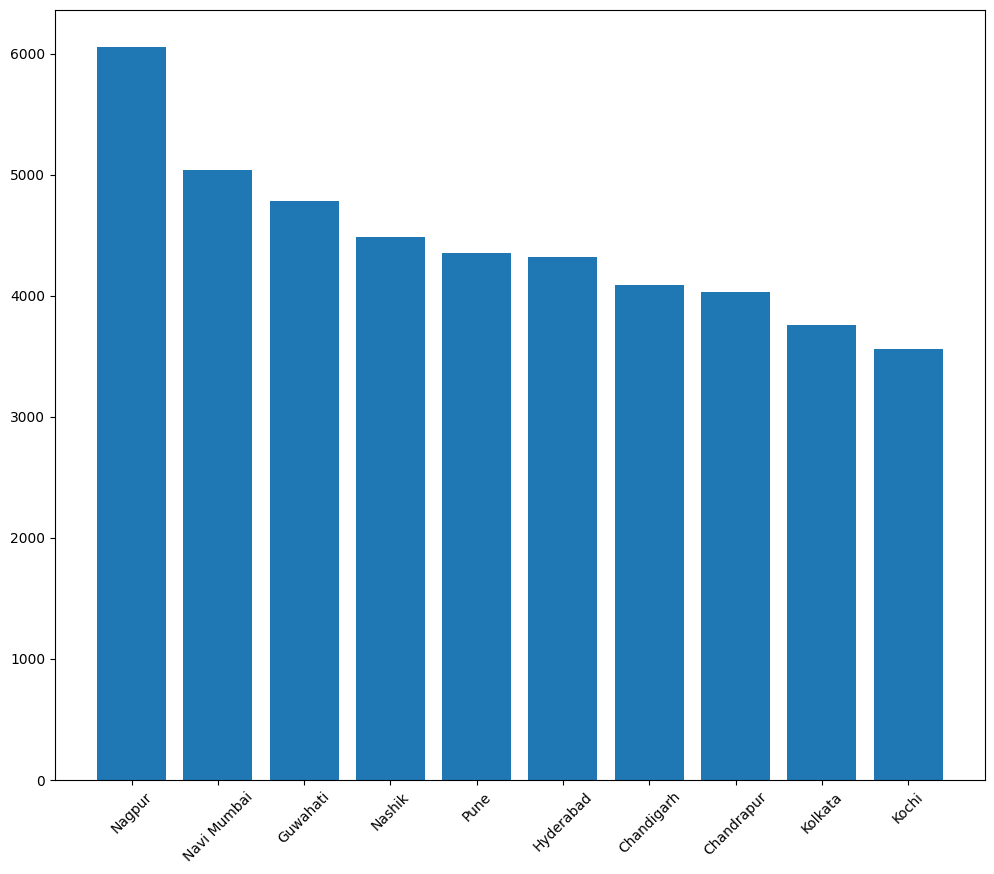

In [79]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12,10))

top_ten = X_train['location'].value_counts()[:10]

ax.bar(x=top_ten.index, height=top_ten.values)
plt.xticks(rotation=45);

### Plot a histogram for the numerical features to explore the data distribution

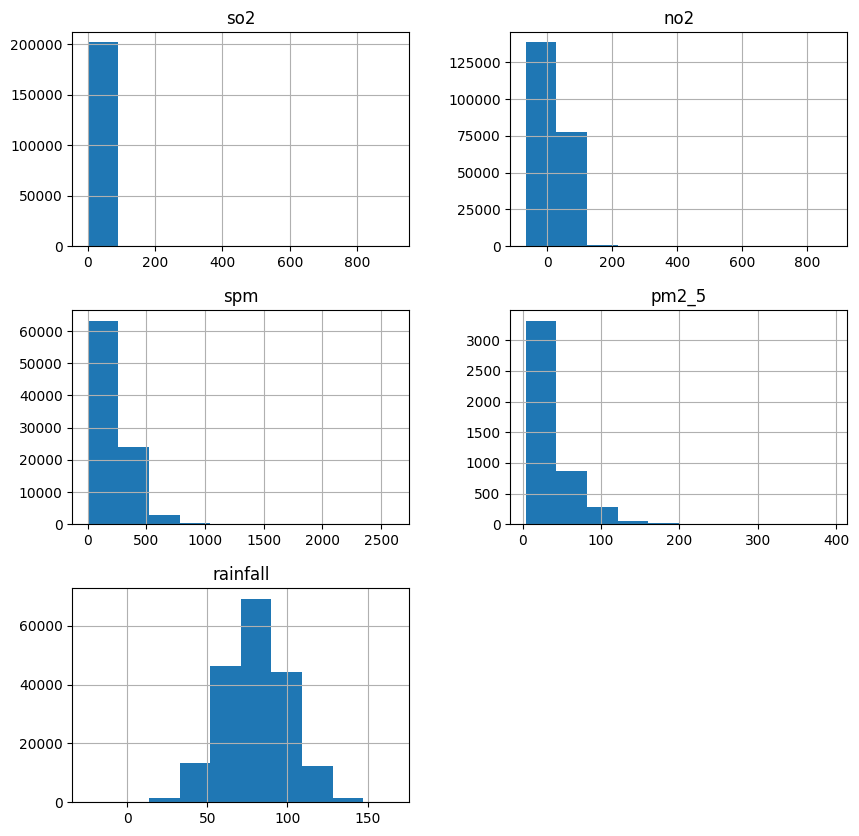

In [80]:
X_train.hist(figsize=(10,10));

# ❓ Missing Data 

The goal of this step is to identify what data is missing in your `X_train`, and to remove columns with too many missing datapoints (in our case, we will use `>30% missing data` as our threshold to remove columns).

Do the following:
1. On your train set, call the function `.isnull()` and explore its output. What `dtype` is it? Do you understand what it does?
2. Now chain both `.isnull()` with `.sum()`: this will give you the number of missing data in each column! Why?
3. Let's sort this output to have the columns with the largest number of missing data at the top. Simply chain a new function, `sort_values()` to the two previous ones. You also need to pass the argument `ascending=False` to the function to have it in descending order.
4. This is great, but how do we know whether a column has more or less then 30% missing data? Simple! Devide the output of step 3 above by the lengths of the `X_train` dataframe (or the position 0 on it's `.shape` tuple)! Anything above 0.3 means >0.3% missing data.


In [81]:
#NaN count for each column
X_train.isnull().sum().sort_values(ascending=False) 

pm2_5       212158
spm         125866
stn_code     74057
rainfall     27860
so2          14716
type           102
date             3
state            0
location         0
no2              0
dtype: int64

In [82]:
#NaN percentage for each column
X_train.isnull().sum().sort_values(ascending=False)/len(X_train) 


pm2_5       0.978855
spm         0.580721
stn_code    0.341684
rainfall    0.128541
so2         0.067897
type        0.000471
date        0.000014
state       0.000000
location    0.000000
no2         0.000000
dtype: float64

## Handling missing data

Now you know what columns have more than 30% missing data. Let's handle them one by one:

### <code>pm2_5</code>

You should have learned from the exercise above that is >97% of data missing in this column. Simply drop the entire column by using the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html">DataFrame.drop()</a> function.

⚠️ You either need to use the `inplace=True` argument or assign the return value of this function back to `X_train` for this change to be reflected in the original `X_train`.

Do the same for the other features (columns) with >30% missing data.

In [83]:
(X_train.pm2_5.isnull().sum()/len(X_train))*100 # Percentage of missing values in pm2_5

97.8854946687521

In [84]:
X_train.drop(columns='pm2_5', inplace=True) # Drop entire column 

X_train.head()

,stn_code,state,location,type,so2,no2,spm,date,rainfall
67566,193,Assam,Guwahati,Residential,6.0,13.0,NaN,05/01/2015,92.268021
295410,642,Maharashtra,Latur,Residential,5.0,16.0,NaN,18/10/2011,NaN
118557,494,Maharashtra,Navi Mumbai,Residential,12.0,44.0,NaN,05/10/2011,NaN
227449,NaN,Tamil Nadu,Madurai,Others,16.6,25.2,72.0,22/05/2006,59.468407
180266,458,Karnataka,Hassan,Residential,5.0,18.0,NaN,06/08/2012,75.121742


In [85]:
X_train.drop(columns='spm', inplace=True) # Drop entire column 
X_train.drop(columns='stn_code', inplace=True) # Drop entire column 

### <code>type</code>

Type also has missing values. However, we will treat these missing values differently here. To understand why, do the following:

1. Check the different categories and the number of instance of the `X_train.type` Series: you can see that there is a category named `Others`.
2. Use the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html">DataFrame.replace()</a> function to replace all of the missing values (`np.nan`) by `Others`. Make sure to reassign those values back to the `X_train` dataframe


🚨 Missing data does not necessarily mean no information!


In [86]:
import numpy as np

X_train.type.isnull().sum() # Number of missing values in 'type'

102

In [87]:
X_train.type.value_counts() #Check count of each category

type
Residential    91352
Industrial     72152
Others         45692
Sensitive       7443
Name: count, dtype: int64

In [88]:
X_train.type.replace(np.nan, 'Others', inplace=True) #Replace NaN by most generic type

In [89]:
X_train.type.value_counts() #Check count of each category

type
Residential    91352
Industrial     72152
Others         45794
Sensitive       7443
Name: count, dtype: int64

# Imputing missing data with Sklearn's <code>SimpleImputer</code>

We have now dropped all of the features (columns) with too many missing data. We are now going to use the Sklearn <code>SimpleImputer()</code> class: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html">make sure to look at the documentation first!</a> Looking at the documentation for classes and function is one of the best way to learn to code efficiently in machine learning.

The second way it to use <a href="https://stackoverflow.com/">Stack Overflow</a> to look for issues you are facing in your code: more often then not, someone has had the same problem and a good solution (with a green tick) is posted. Try to use these sources of information first before calling the teaching assistant for help: it is important to learn to troubleshoot your own problems first.

Remember from the class that we will use the `fit()` function on our imputer class to learn the statistics from our `X_train`, and then use the `transform()` function to change our data!


## Numerical data

Often, when you apply transformation to your data you will want to treat your numerical data differently than you categorical data. For instance, replacing a missing numerical value by the `mean()` of a column makes perfect sense. But this would not make sense for a categorical value (what is the `mean` of the `location` column?)

So, we need to do the following:

1. Identify the `numerical` columns: you can do this by calling the `select_dtypes()` function on the `X_train` dataframe, and passing the argument `include=np.number` to this function. This will return a dataframe containing only numerical columns! If you call `.columns` on it, you will obtain an array of column names. I suggest you store this in a variable named `num_cols` as it will be useful in later steps.
2. Import the `SimpleImputer` class from `sklearn.impute`
3. Create `num_imputer` instance with the "mean" as its strategy: `num_imputer = SimpleImputer(strategy="mean")`
4. Fit your new imputer on the `num_cols` of `train_test`
5. You can check the statistics (in this case, the means) of each columns by calling the `.statistics_` property of the `num_imputer`
6. Now replace the original numerical columns in `X_train` by the imputed ones, using the `transform` method of your `num_imputer`

**hint** for this last step, you can write code that looks like `X_train[num_col] = ...`

In [90]:
from sklearn.impute import SimpleImputer

num_cols = X_train.select_dtypes(include=np.number).columns # redo numerical columns

imputer = SimpleImputer(strategy="mean") # Instanciate a SimpleImputer object with strategy of choice

In [91]:
imputer.fit(X_train[num_cols]) # Call the "fit" method on the object, using X_train numerical data 

SimpleImputer()

In [92]:
X_train[num_cols] = imputer.transform(X_train[num_cols]) # Call the "transform" method on the object

In [93]:
imputer.statistics_ # The mean is stored in the transformer's memory

array([11.1332703 , 26.38944951, 79.91140748])

### Categorical data

For the categorical data, you can follow a very similar approach as above:
1. Find all of the categorical columns (`cat_cols`), this time using `exclude=np.number` in step 1 from the numerical transformation
2. Create a new instance of the `SimpleImputer` class, call it `cat_imputer`, with the `"most_frequent"` strategy.
3. Apply this new imputer to all categorical columns in a similar way as you did above for numerical columns.

In [94]:
cat_cols = X_train.select_dtypes(exclude=np.number).columns
cat_imputer = SimpleImputer(strategy="most_frequent") # Instanciate a SimpleImputer object with "most_frequent" strategy

X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols]) # can 'fit_transform' in one line...


### ☑️ Test your code

In [95]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = X_train
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.11.2, pytest-7.4.2, pluggy-1.3.0 -- /Users/cedric/.pyenv/versions/3.10/envs/dsml4pe/bin/python3
cachedir: .pytest_cache
rootdir: /Users/cedric/code/cedricmjohn/teaching/Machine-Learning-for-Planet-Earth-Practicals/01-Data-Preparation/02-Preprocessing-101/tests
plugins: anyio-4.0.0
collecting ... collected 2 items

test_missing_values.py::TestMissing_values::test_nans PASSED             [ 50%]
test_missing_values.py::TestMissing_values::test_number_of_columns PASSED [100%]

============================== 2 passed in 0.26s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master



# Outliers 

We will take a simple approach to outliers here: we will consider that negative values are not possible given that we are looking at concentration of chemicals in the atmosphere. So, we will remove all negative values.

Do the following:

1. Find the minimum values of all `num_cols` columns (i.e. your numerical columns)
2. Drop the rows where any of the `num_cols` are less than zero. Check the `DataFrame.drop()` function documentation to see how to do this 

**hint**: You may want to find the `index` of the rows where the features you want to remove are < zero, and then pay attention to the `index` parameter of the `drop()` function!

In [96]:
X_train[num_cols].min()

so2          0.000000
no2        -66.400000
rainfall   -24.682525
dtype: float64

In [97]:
idx = X_train[(X_train.rainfall<0) | (X_train.no2<0)].index

X_train = X_train.drop(index=idx)
X_train[num_cols].min()

so2         0.00000
no2         0.00000
rainfall    0.49775
dtype: float64

# Feature Engineering

Here, we are going to do some feature engineering on `so2` and `no2`. But first, plot the histogram of these two features and see what you observe:


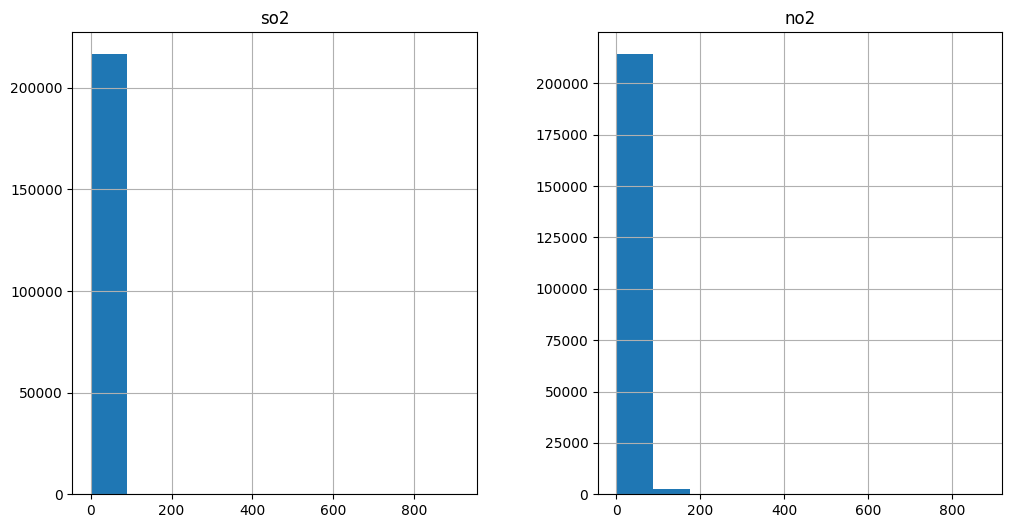

In [98]:
X_train[['so2', 'no2']].hist(figsize=(12, 6));

## Transforming the two features to a log scale

We are going to transform these two features into a logarithmic scale, because this will distribute our data better. Taking the log of a value is a very common data engineering trick that can sometime help improve the signal-to-noise ratio of your dataset.

Do the following:

1. For both `so2` and `no2` replace the original value by their log. Use `np.log`, and to avoid numerical error, add a small number (`0.001`) to the original values (because the log of 0 is not a number)
2. Draw the histograms again: did they improve?

In [99]:
for feature in ['so2', 'no2']:
    X_train[feature] = np.log(X_train[feature]+0.001) # adding a small constant to avoid log of zero

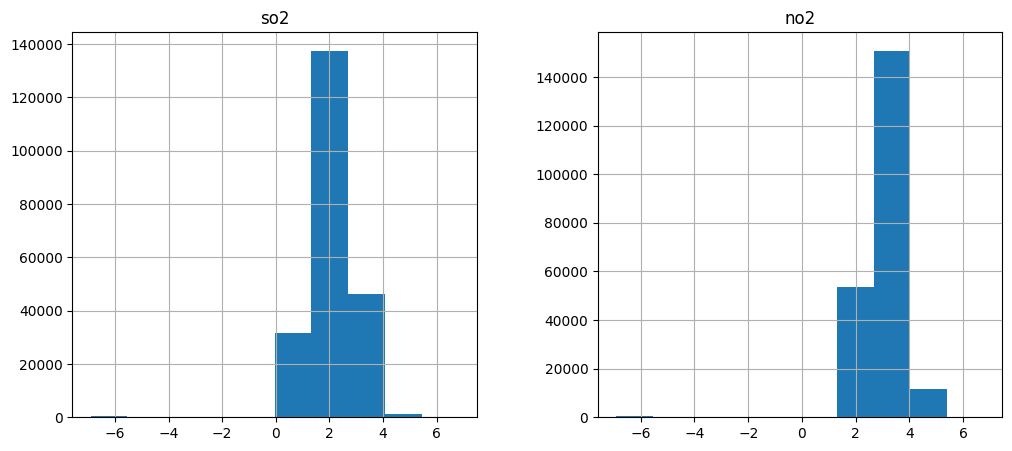

In [100]:
X_train[['so2', 'no2']].hist(figsize=(12, 5));

# Feature Scaling

We are now ready to scale our numerical features! Import the `StandardScaler` class from `sklearn.preprocessing`. Remember, this is a `scikit-learn Transformer` so you already know how to use this type of object (if you forgot, go back to the `SimpleImputer` and study what you did with it.

Do the following:
1. Import the `StandardScaler`
2. Create an instance of `StandardScaler` called `scaler`
3. Fit the `scaler` to your numerical data, and replace the numerical columns in your `X_train` by their scaled versions!

**hint**: If in doubt, read the doc! And again, even though this is a new class, you will use it in a very similar way as the `SimpleImputer` (but of course without the need to use the `strategy` argument)

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler() # Instanciate StandarScaler

In [103]:
scaler.fit(X_train[num_cols]) # Fit scaler to data

StandardScaler()

In [104]:
X_train[num_cols]=scaler.transform(X_train[num_cols])

In [105]:
X_train

,state,location,type,so2,no2,date,rainfall
67566,Assam,Guwahati,Residential,-0.355873,-0.661298,05/01/2015,0.660691
295410,Maharashtra,Latur,Residential,-0.566040,-0.387111,18/10/2011,-0.000094
118557,Maharashtra,Navi Mumbai,Residential,0.443185,0.948745,05/10/2011,-0.000094
227449,Tamil Nadu,Madurai,Others,0.817282,0.212743,22/05/2006,-1.093307
180266,Karnataka,Hassan,Residential,-0.566040,-0.231577,06/08/2012,-0.256227
...,...,...,...,...,...,...,...
119927,Uttar Pradesh,Jhansi,Others,0.085631,0.375249,27/03/2009,0.322764
259456,West Bengal,Durgapur,Industrial,0.356759,0.951742,06/08/2004,0.616512
131993,Andhra Pradesh,Hyderabad,Residential,-0.566040,0.033413,23/02/2012,1.545098
146945,Andhra Pradesh,Guntur,Residential,-0.566040,-0.387111,09/12/2013,-0.243921


### ☑️ Test your code

In [106]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = X_train
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.11.2, pytest-7.4.2, pluggy-1.3.0 -- /Users/cedric/.pyenv/versions/3.10/envs/dsml4pe/bin/python3
cachedir: .pytest_cache
rootdir: /Users/cedric/code/cedricmjohn/teaching/Machine-Learning-for-Planet-Earth-Practicals/01-Data-Preparation/02-Preprocessing-101/tests
plugins: anyio-4.0.0
collecting ... collected 2 items

test_scaling.py::TestScaling::test_no2 PASSED                            [ 50%]
test_scaling.py::TestScaling::test_so2 PASSED                            [100%]

============================== 2 passed in 0.23s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master



# Encoding

Our numerical features are all ready now. We still want to use some of our categorical features, notably the `state` column. But to do this, we first need to encode it using the `OneHotEncoder` class.

Do the following:

1. From `sklearn.preprocessing` import the `OneHotEncoder` class
2. Create a new instance of the `OneHotEncoder` class, call it `ohe`. Make sure to pass the argument `sparse_output=False` when you create the encoder!
3. Fit the `ohe` to the `X_train[["state"]]` feature
4. We want to capture the column names in the `ohe`. Create a variable with this code: `encoded_columns = ohe.categories_[0]`. Read the doc to understand what this does!
5. Create a new array called `state_encoded` by using `ohe.transform(X_train[["state"]])`
6. Only keep the numerical columns of `X_train`, for instance, by doing `X_train = X_train[num_cols]`
7. Now add the new One-hot-encoded columns to `X_train` by doing `X_train[encoded_columns] = state_encoded`
8. Check how your new `X_train` dataframe looks, and check its size: you should see (216735, 36)

In [107]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output = False)

ohe.fit(X_train[['state']])

encoded_columns = ohe.categories_[0]
state_encoded = ohe.transform(X_train[['state']])

X_train = X_train[num_cols]

X_train[encoded_columns] = state_encoded 

X_train.head()


/var/folders/nx/sdg8lrc53nggx6td7vn5k5140000gn/T/ipykernel_51215/1933205319.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[encoded_columns] = state_encoded
/var/folders/nx/sdg8lrc53nggx6td7vn5k5140000gn/T/ipykernel_51215/1933205319.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[encoded_columns] = state_encoded
/var/folders/nx/sdg8lrc53nggx6td7vn5k5140000gn/T/ipykernel_51215/1933205319.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,so2,no2,rainfall,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra & Nagar Haveli,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Uttar Pradesh,Uttarakhand,Uttaranchal,West Bengal
67566,-0.355873,-0.661298,0.660691,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295410,-0.566040,-0.387111,-0.000094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118557,0.443185,0.948745,-0.000094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227449,0.817282,0.212743,-1.093307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
180266,-0.566040,-0.231577,-0.256227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
X_train.shape

(216734, 37)

### ☑️ Test your code

In [111]:
from nbresult import ChallengeResult

max_values = [X_train[feature].max() for feature in ['Assam','Bihar', 'Chandigarh', 'Chhattisgarh']]
nb_ohe = X_train.drop(columns=['so2','no2','rainfall']).columns.shape[0]

result = ChallengeResult('encoding',
                         nb_columns = len(X_train.columns),
                         max_values = max_values,
                         nb_ohe = nb_ohe
                         
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.11.2, pytest-7.4.2, pluggy-1.3.0 -- /Users/cedric/.pyenv/versions/3.10/envs/dsml4pe/bin/python3
cachedir: .pytest_cache
rootdir: /Users/cedric/code/cedricmjohn/teaching/Machine-Learning-for-Planet-Earth-Practicals/01-Data-Preparation/02-Preprocessing-101/tests
plugins: anyio-4.0.0
collecting ... collected 3 items

test_encoding.py::TestEncoding::test_columns PASSED                      [ 33%]
test_encoding.py::TestEncoding::test_max_values PASSED                   [ 66%]
test_encoding.py::TestEncoding::test_number_of_features PASSED           [100%]

============================== 3 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master



# Preparing our `y_train`

## Droping samples
When we prepared our `X_train` above, we ended up droping rows because some were duplicated, or outliers. If you test the `shape` of our `y_train` and compare it to the shape of the `X_train`, you will notice that we have different number of samples. This will be a problem soon, when we try to model.

Luckily, we can use the index values of the `X_train` to only keep the `y_train` that are relevant to us!

Do the following:

1. create a new variable, `idx`, which is equal to the `index` of the `X_train` dataset
2. Reassign `y_train` to only contain the values with the same index as `X_train`: `y_train = y_train[idx]`
3. If you check the `shape` of your `y_train`, it should be now (216735,)

In [112]:
idx = X_train.index
y_train = y_train[idx]
y_train.shape

(216734,)

### ☑️ Test your code

In [114]:
from nbresult import ChallengeResult

result = ChallengeResult('y_cat',
                         dataset = y_train
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.11.2, pytest-7.4.2, pluggy-1.3.0 -- /Users/cedric/.pyenv/versions/3.10/envs/dsml4pe/bin/python3
cachedir: .pytest_cache
rootdir: /Users/cedric/code/cedricmjohn/teaching/Machine-Learning-for-Planet-Earth-Practicals/01-Data-Preparation/02-Preprocessing-101/tests
plugins: anyio-4.0.0
collecting ... collected 1 item

test_y_cat.py::TestY_cat::test_number_cat PASSED                         [100%]

============================== 1 passed in 0.18s ===============================


💯 You can commit your code:

git add tests/y_cat.pickle

git commit -m 'Completed y_cat step'

git push origin master



# Modelling

Now comes the fun bit! We are going to try to predict the levell of pollution (`y_train_cat`) based on our features (`X_train`). We will also use cross validation to see which model performs better.

Do the following:
1. Import `LinearRegression` from `sklearn.linear_model` as well as `cross_validate` from `sklearn.model_selection`
2. Create a new instance of `LinearRegression`, call it `lr_model`. 
3. Cross validate (`cv=5`, `scoring='neg_mean_squared_error'`) your logistic regression model: make sure to capture the output of the function in a variable (`lr_cv`)
4. `lr_cv` should be a Python dictionary containing `fit_time`, `score_time`, and `test_score`. Calculate the mean test score as the `root mean squared error` for this linear regression.

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

lr_model = LinearRegression()

lr_cv = cross_validate(lr_model, X_train[['so2', 'no2', 'rainfall']], y_train, cv=5, scoring='neg_mean_squared_error')

In [122]:
lr_cv['test_score'].mean()

-4739.057604390413

In [123]:
np.sqrt(abs(lr_cv['test_score'].mean()))

68.84081350761635

### How good is your score?
Is your score decent? Why do you think that is?
<details><summary>Answer</summary> This is a terrible score of course: the root mean square error is magnitudes larger than what we are trying to predict. But why? This has to do in part with the fact that we now have a lot of columns that determines where the measurement was taken. This does not help in the prediction, and add noise. We will see this week that having the right number of features (and features with high predictive power) is key. Another possible explanation is that the relationship between our `y` and our `X` is not linear, and thus a linear model such as ours will not work well.</details>

## Modelling attempt 2

Now do exactly the same process as above, but instead of modelling with the entire `X_train`, only use the features `so2`, `no2`, and `rainfall`.

Is your new `lr_cv` score a good score? Save your answer as either `True` or `False` (boolean) in a variable called `is_good_score`:

In [124]:
lr_cv = cross_validate(lr_model, X_train[['so2', 'no2', 'rainfall']], y_train, cv=5, scoring='neg_mean_squared_error')
np.sqrt(abs(lr_cv['test_score'].mean()))

68.84081350761635

In [95]:
is_good_score = False

<details><summary>Answer</summary> Yes, the score is now within the same order of magnitude as our `y`. So this is a good improvement. However, looking critically at it, we can see that the mean error is about 80% of the data itself. So our error is still large. This means that our target variables are not predictive enough for the task.</details>

### ☑️ Test your code

In [126]:
from nbresult import ChallengeResult

result = ChallengeResult('cross_validate',
                         cv_lr = lr_cv,
                         is_good = is_good_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.11.2, pytest-7.4.2, pluggy-1.3.0 -- /Users/cedric/.pyenv/versions/3.10/envs/dsml4pe/bin/python3
cachedir: .pytest_cache
rootdir: /Users/cedric/code/cedricmjohn/teaching/Machine-Learning-for-Planet-Earth-Practicals/01-Data-Preparation/02-Preprocessing-101/tests
plugins: anyio-4.0.0
collecting ... collected 2 items

test_cross_validate.py::TestCross_validate::test_cv_score PASSED         [ 50%]
test_cross_validate.py::TestCross_validate::test_is_good_score PASSED    [100%]

============================== 2 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/cross_validate.pickle

git commit -m 'Completed cross_validate step'

git push origin master



# 🏁 Finished!

Well done! Indeed, this was a terrible score. But the goal of this exercise was to make you familiar with the process, not necessarily to gain the best predictive model. We will be able to do this in subsequent exercises.<br> 
<span style="color:teal">**Push your exercise to GitHub**</span>, and move on to the next one.